In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total'] = df['TV'] + df['radio'] + df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


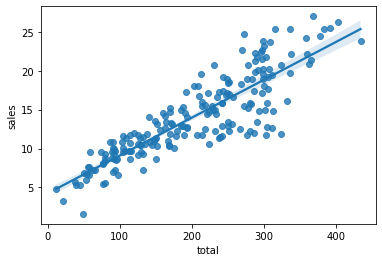

In [6]:
sns.regplot(x='total', y='sales', data=df);

In [7]:
X = df['total']
y = df['sales']

In [8]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [9]:
pot = np.linspace(0,500,100)

In [10]:
p_sales = 0.04868788*pot + 4.24302822

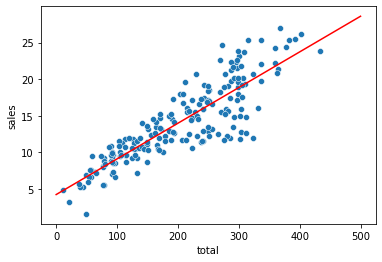

In [11]:
sns.scatterplot(x='total', y='sales', data=df);
plt.plot(pot, p_sales, color='r');

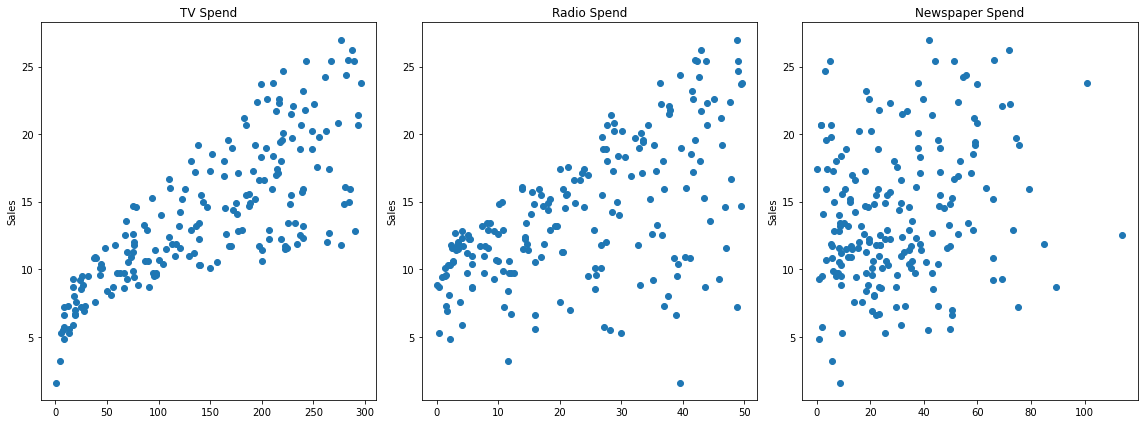

In [12]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [13]:
X = df.drop('total', axis=1)

In [14]:
X = X.drop('sales', axis=1)

In [15]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [16]:
y = df['sales']

In [17]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
len(df)

200

In [21]:
len(X_train)

140

In [22]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [23]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [24]:
len(X_test)

60

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
test_predictions = model.predict(X_test)

In [29]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

In [30]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
df['sales'].mean()

14.022500000000003

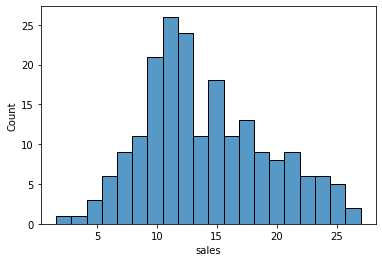

In [33]:
sns.histplot(data=df, x='sales', bins=20);

In [34]:
mean_absolute_error(y_test, test_predictions)

1.2137457736144805

In [35]:
mean_squared_error(y_test, test_predictions)

2.298716697886378

In [36]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993877

In [37]:
test_residuals = y_test - test_predictions

In [38]:
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

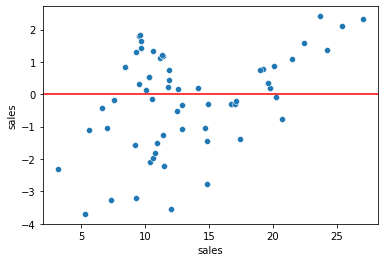

In [39]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0,color='r')

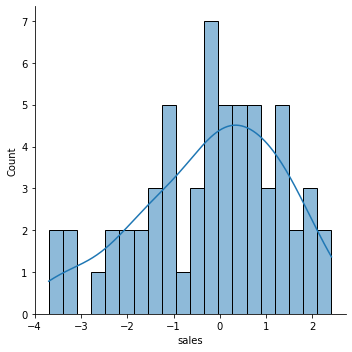

In [40]:
sns.displot(test_residuals, bins=20, kde=True);

In [41]:
import scipy as sp

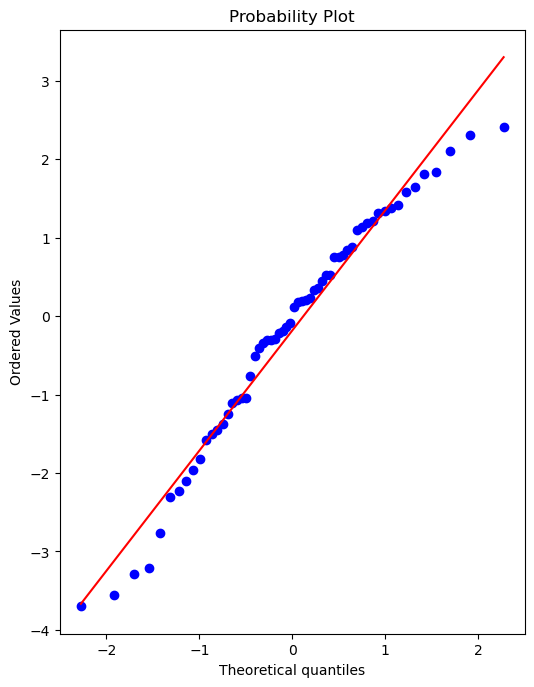

In [42]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

In [43]:
final_model = LinearRegression()

In [44]:
final_model.fit(X,y)

LinearRegression()

In [45]:
final_model.coef_
## coefficients of tv radio and newspaper

array([ 0.04576465,  0.18853002, -0.00103749])

In [46]:
y_hat = final_model.predict(X)

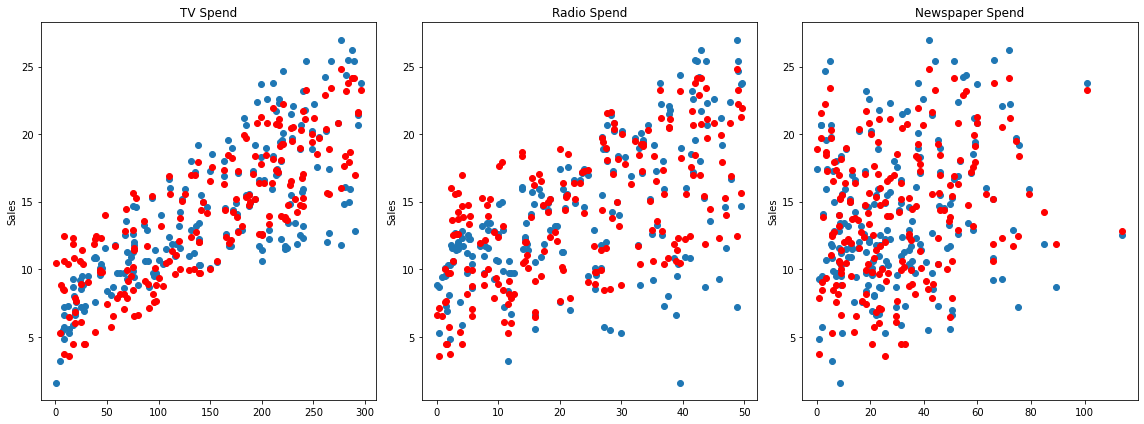

In [47]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [48]:
    from joblib import dump, load

In [49]:
dump(final_model, "Final_sales_model.joblib")
## save it to ur system and send it

['Final_sales_model.joblib']

In [50]:
loaded_model = load('Final_sales_model.joblib')
#they can use it this way

In [51]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [52]:
X.shape

(200, 3)

In [53]:
#149 tv units, 22 radio, 12 newspaper
campaign = [[149,22,12]]

In [54]:
loaded_model.predict(campaign)

array([13.893032])

In [55]:
##POLYNOMIAL REGRESSION

In [56]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [57]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
poly_con = PolynomialFeatures(degree=2,include_bias=False)

In [60]:
poly_con

PolynomialFeatures(include_bias=False)

In [61]:
poly_con.fit(X)

PolynomialFeatures(include_bias=False)

In [62]:
poly_con.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [63]:
##or the whole thing in one step
poly_features = poly_con.fit_transform(X)

In [64]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [65]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [66]:
X_train, X_test,y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [67]:
model1 = LinearRegression()

In [68]:
model1.fit(X_train,y_train)

LinearRegression()

In [69]:
test_pred = model1.predict(X_test)

In [70]:
test_pred

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [71]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

In [72]:
MAE = mean_absolute_error(y_test, test_pred)

In [73]:
MSE = mean_squared_error(y_test, test_pred)

In [74]:
RMSE = np.sqrt(MSE)

In [75]:
MAE

0.48967980448038056

In [76]:
RMSE

0.664643175726924

In [77]:
model1.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [78]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [79]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [80]:
##create diff order of poly
##split into train and test
#fit on train
#store and save the rmse
#plot the results

In [81]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [82]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.4339344356902067,
 0.35170836883993606,
 0.25093429381786897,
 0.1945666472024403,
 5.423737279770718,
 0.14168056686637134,
 0.17093527228363956]

In [83]:
test_rmse_errors

[1.5161519375993877,
 0.664643175726924,
 0.5803286825161322,
 0.5077742623175882,
 2.575837063490081,
 4.214027384734879,
 1374.9574048884183,
 4344.727850519797,
 93796.02671838581]

In [84]:
X.shape

(200, 3)

In [85]:
y.shape

(200,)

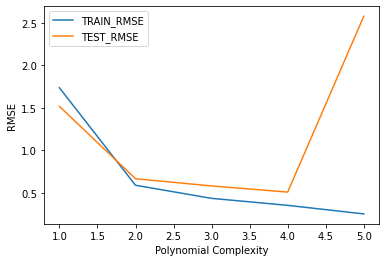

In [86]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN_RMSE');
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST_RMSE');
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend();

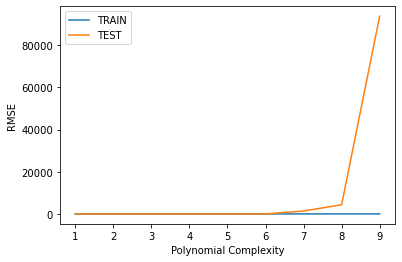

In [87]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend();

In [88]:
##FINAL MODEL DEPLOYMENT

In [89]:
final_poly = PolynomialFeatures(degree=3, include_bias=False)

In [90]:
final_model=LinearRegression()

In [91]:
full_converted_X = final_poly.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [92]:
dump(final_poly,'final_poly.joblib')

['final_poly.joblib']

In [93]:
dump(final_model, 'final_model.joblib')

['final_model.joblib']

In [94]:
loaded_conv = load('final_poly.joblib')

In [95]:
loaded_model = load('final_model.joblib')

In [96]:
campaign = [[149,22,12]]

In [97]:
data = loaded_conv.fit_transform(campaign)

In [98]:
loaded_model.predict(data)
##end of polyreg

array([14.64501014])

In [99]:
poly_con = PolynomialFeatures(degree=3, include_bias=False)

In [100]:
poly_features = poly_con.fit_transform(X)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3,random_state=101)

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()

In [104]:
scaler.fit(X_train)

StandardScaler()

In [105]:
X_train = scaler.transform(X_train)

In [106]:
X_test = scaler.transform(X_test)

In [107]:
##ridge regression

In [108]:
from sklearn.linear_model import Ridge

In [109]:
ridge_model = Ridge(alpha=10)

In [110]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [111]:
test_preds = ridge_model.predict(X_test)

In [112]:
mae = mean_absolute_error(y_test, test_preds)

In [113]:
mae

0.5774404204714175

In [114]:
rmse = np.sqrt(mean_squared_error(y_test, test_preds))

In [115]:
rmse

0.8946386461319681

In [116]:
from sklearn.linear_model import RidgeCV

In [117]:
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10.0), scoring = 'neg_mean_absolute_error')

In [118]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [119]:
ridge_cv_model.alpha_

0.1

In [120]:
ridge_cv_model1 = RidgeCV(alphas = np.linspace(1,11,1))

In [121]:
ridge_cv_model1.fit(X_train,y_train)

RidgeCV(alphas=array([1.]))

In [122]:
from sklearn.metrics import SCORERS

In [123]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [124]:
test_preds = ridge_cv_model.predict(X_test)

In [125]:
test_preds

array([14.25006161, 19.10205204, 12.44776087, 17.07029103,  7.93609517,
        7.10314552, 19.94990664, 17.24524365, 10.33548736, 19.85951926,
        9.37933062, 13.9569529 , 11.85445773, 23.29303451, 19.30247423,
        9.42431717, 12.42484839,  9.21704461,  8.70229329, 21.42382243,
        7.14698141, 19.35684761, 27.33199316, 24.44887898,  9.23720121,
       11.46268721, 20.47427126,  9.4597969 , 12.55070677,  8.39250566,
        8.7928193 , 19.92435249, 10.8069225 ,  7.10760344, 18.16473242,
        9.30970124, 10.54163577,  9.71377387,  7.31109512, 10.76826686,
       12.32939318, 10.34155545, 11.39134453,  7.74592784, 11.73219215,
       10.60945023,  5.74446924, 15.33163484, 13.01377062, 22.65350817,
       10.59700761, 12.94758932, 14.71822795, 12.01718014, 11.35600126,
        5.47860188, 24.96469385,  9.42600079, 17.27904849, 15.59419989])

In [126]:
mae = mean_absolute_error(y_test,test_preds)

In [127]:
rmse = np.sqrt(mean_squared_error(y_test,test_preds))

In [128]:
mae

0.42737748843414897

In [129]:
rmse

0.6180719926948917

In [130]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

In [131]:
from sklearn.linear_model import LassoCV

In [132]:
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100,cv=5,max_iter=1000000)

In [133]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, max_iter=1000000)

In [134]:
lasso_cv_model.alpha_

0.004943070909225827

In [135]:
test_pred = lasso_cv_model.predict(X_test)

In [136]:
test_pred

array([14.16203485, 19.2942685 , 12.34178429, 16.97745571,  8.02340978,
        6.95799942, 20.11875833, 17.32880647, 10.43139937, 19.96174466,
        9.56959473, 13.94205676, 11.90851817, 23.35138146, 19.56656277,
        9.27838151, 12.30485359,  9.30152997,  8.56733436, 21.51633564,
        7.06650884, 19.3377222 , 27.28027149, 24.52239173,  9.17172464,
       11.60918126, 20.73841405,  9.29953525, 12.56948515,  8.40051066,
        8.56984613, 20.03587647, 10.83439653,  6.79505173, 18.18820331,
        9.48107219, 10.41803957,  9.70785725,  7.22932328, 10.85467692,
       12.85491418, 10.51648453, 11.26905127,  7.41516944, 11.54705407,
       10.42233031,  6.02782344, 15.36338733, 13.18723611, 22.67619584,
       10.4721906 , 13.01165791, 14.56684361, 11.90062303, 11.47303307,
        5.59404766, 25.06115365,  9.69468957, 17.44771723, 15.60375637])

In [137]:
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))

In [138]:
mae

0.4335034618590069

In [139]:
rmse

0.6063140748984026

In [140]:
lasso_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

In [141]:
from sklearn.linear_model import ElasticNetCV

In [142]:
elastic_model = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .99, 1], eps=0.001, n_alphas=100, max_iter=1000000)

In [143]:
elastic_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.99, 1], max_iter=1000000)

In [144]:
elastic_model.l1_ratio_
##went w lasso itself

1.0

In [145]:
elastic_model.alpha_

0.004943070909225827

In [146]:
test_pred = elastic_model.predict(X_test)

In [147]:
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))

In [148]:
mae

0.4335034618590069

In [149]:
rmse

0.6063140748984026